In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\wasim\tourism_package\data\tour_package.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Column Information
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer

# Exploratory Data Analysis 

## Descriptive Analysis
- Number of rows and columns
- Data type of features and does it makes sense
- Null values?
- Distribution
- Outliers?
- Mean and variance
- Understand Values

In [4]:
df.shape

(4888, 20)

In [5]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

**Note: All the floats values can be converted to the int as it does not have values after point**

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Note: There are 8 columns which has null values, so it will be fun to handle them**

### Distribution and skewness

In [7]:
# Seperate the numerical and categorical columns

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

continuous_columns = [i for i in df.columns if df[i].nunique() > 25]

continuous_columns

['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']

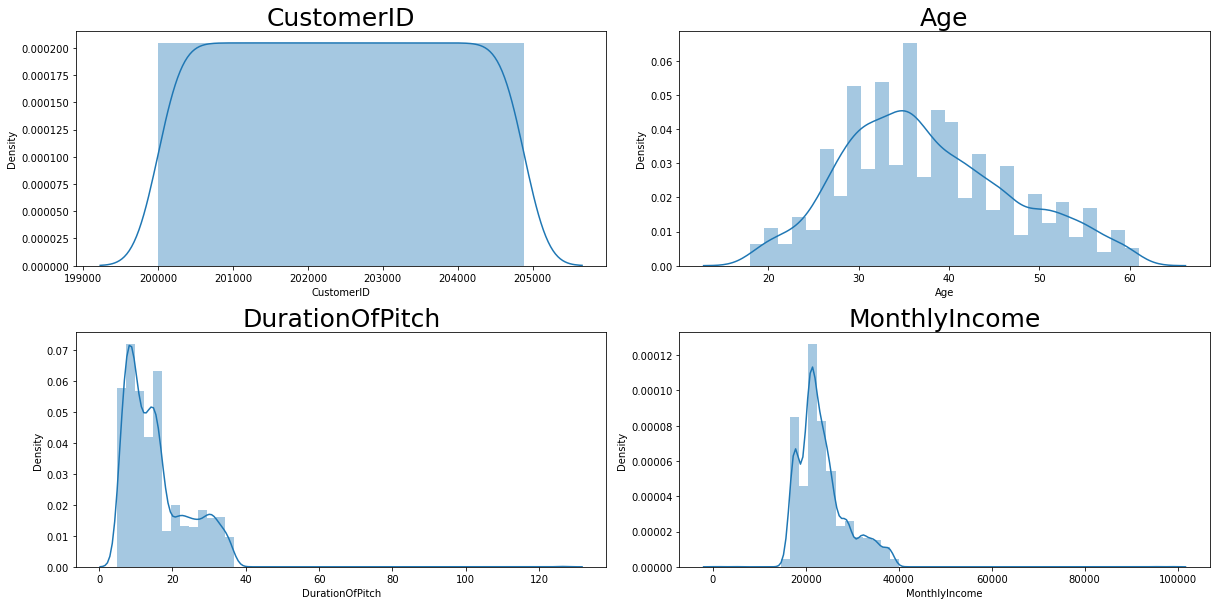

In [8]:
plt.figure(figsize=(17,75))

for i in range(len(continuous_columns)):
    plt.subplot(18,2,i+1)
    sns.distplot(df[continuous_columns[i]])
    plt.tight_layout()
    plt.title(continuous_columns[i],fontsize=25)

plt.show()


- Positiviely Skewed : DurationOfPitch, NumberOfTrips

In [9]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Exploration of Values

In [10]:
percentage = df.ProdTaken.value_counts(normalize=True)*100
pielabels = ["Bought","Not-Bought"]

# Plot PieChart with Ploty library
f1 = px.pie(values= percentage, names= pielabels, title="Percentage of package bought and not bought")
f1.update_traces(textposition="inside", textinfo="percent+label")
f1.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
f1.show()

#### Target column is imbalanced

In [11]:
ranges = [18, 25, 35, 45, 55, 60]

not_taken_data = df[df['ProdTaken'] == 1]
print(not_taken_data.shape)

not_taken_cancelled = not_taken_data["ProdTaken"].groupby(pd.cut(df.Age, ranges)).count()
age_range_total = df["ProdTaken"].groupby(pd.cut(df.Age, ranges)).count()

not_taken_cancelled/age_range_total

(920, 20)


Age
(18, 25]    0.405405
(25, 35]    0.219945
(35, 45]    0.125000
(45, 55]    0.133075
(55, 60]    0.214660
Name: ProdTaken, dtype: float64

#### Note: 
- Age group of 18 to 25 buy most package
- Age between  35 to 55 is lowest, as in these age groups mostly there

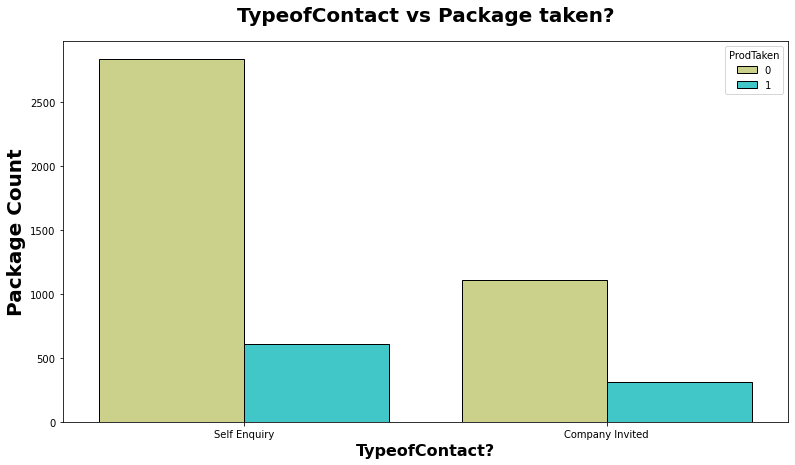

In [12]:
plt.subplots(figsize=(13,7))
sns.countplot(x="TypeofContact",hue="ProdTaken", data= df,ec = "black",palette="rainbow_r")
plt.title("TypeofContact vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("TypeofContact?", weight="bold", fontsize=16)
plt.show()

**Note: **
- The

In [13]:
df['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

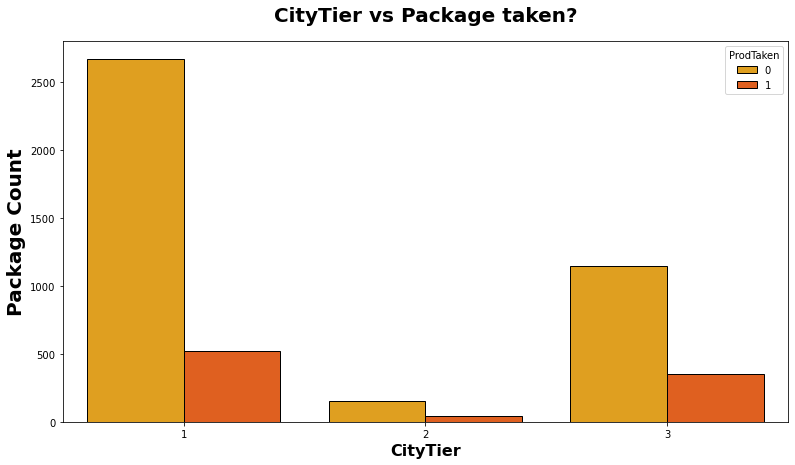

In [14]:
plt.subplots(figsize=(13,7))
sns.countplot(x="CityTier",hue="ProdTaken", data= df,ec = "black",palette="autumn_r")
plt.title("CityTier vs Package taken?", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("CityTier", weight="bold", fontsize=16)
plt.show()

## Null and duplicate Values  
- If there are null values, how you will prepare it

## Outliers
- If there are outliers, remove them

## Correlations/Relationships
- Correlation with target variable
- Multi-collinearity

## Feature Engineering and Prepare data for Model
- Is it possible to create new features
- Transform Numberical Values if require
- Handle Categorical values